# Big Mart Sales Data Analysis

Submitted by : Sayan De
    
Roll : FT252082

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
#importing dataset
df = pd.read_csv('BigMartSales.csv')

# Dataset Overview

In [128]:
sns.set()

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#dimension
df.shape

(8523, 12)

In [7]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Questions

### 1.What is the shape of this dataset?

In [13]:
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset')

There are  8523 rows and  12 columns in the dataset


### 2.Calculate relevant statistics (count, mean, standard deviation, minimum, 25%, 50%, 75%, maximum) of this dataset.

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### 3.How data cleaning process is performed on this dataset?

In [15]:
#check null values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see the columns 'Item_Weight' and 'Outlet_Size' has respectively 1463 and 2410 null values

In [16]:
#% break up for null values
df.isnull().sum()/len(df)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

as the 2 columns has 17.16% and 28.27 % null values we cant drop those columns as they carry significant information
So, in order to carry out data cleaning, we need to fill the Null values with appropiate information

So, to clean the dataset we will be filling the Null values with their respective central tendencies (mean, mode) to avoid distorting the overall statistics of the dataset

### 4.How null values in Item_Weight and Outlet_Size are imputed?

First we need to find out the type of values the 2 columns contains

In [19]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

so Outlet size is a categorical variable with values like Medium , small and High

For these column we can replace Null values with the Central tendecy i.e Mode of the column
,means we will be replacing the null values with the most occured value for this column

The mode of the column 'Outlet Size' is :

In [151]:
df['Outlet_Size'].mode()[0]

'Medium'

<Axes: >

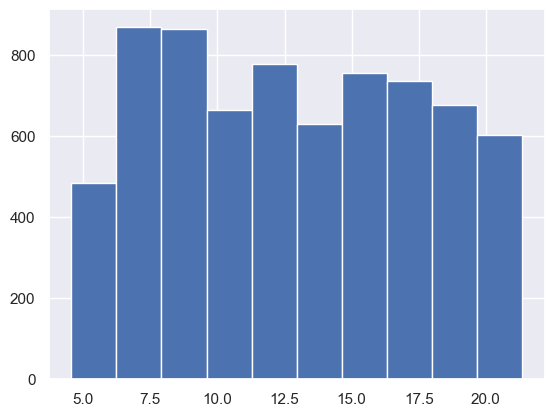

In [129]:
df['Item_Weight'].hist()

From the histogram as we can see the data for the column is spread out between 5 and 20

So, as a solution approach we can replace the Null values for this column with the mean/average of the column



In [152]:
df['Item_Weight'].mean()

12.857645184135976

In [27]:
#creating a temporary dataframe to perform data clean operations
df_new = df.copy()

# Imputing missing values in Item_Weight with mean
df_new['Item_Weight'].fillna(df_new['Item_Weight'].mean(), inplace=True)

# Imputing missing values in Outlet_Size with mode
df_new['Outlet_Size'].fillna(df_new['Outlet_Size'].mode()[0], inplace=True)


In [28]:
#cleaned dataset
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
df_new.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data cleaning has been done and all Null values has been replaced by appropiate central tendencies and imputated for the columns

### 5.Which item has maximum sales?

In [33]:
df.sort_values(by = 'Item_Outlet_Sales', ascending = False).head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


The above item has the maximum Sales amount

### 6.How many unique values are there in each column?

In [34]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### 7.Visualize Item_Fat_Content using pie charts. What percentage of items are in low fat and normal fat?

In [47]:
# distribution of data
fat_content = df['Item_Fat_Content'].value_counts()
fat_content

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [63]:
# Data cleaning

df['Item_Fat_Content'].replace('LF','Low Fat', inplace = True)
df['Item_Fat_Content'].replace('low fat','Low Fat', inplace = True)
df['Item_Fat_Content'].replace('low fat','Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg','Regular', inplace = True)

In [66]:
fat_content = df['Item_Fat_Content'].value_counts()
fat_content

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

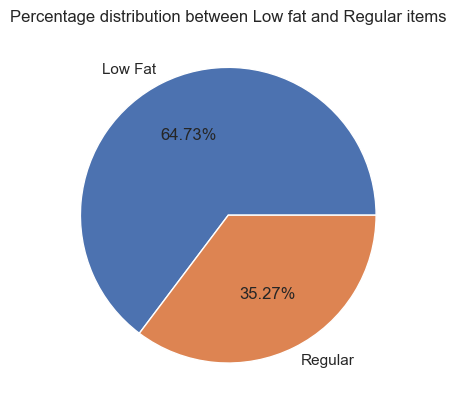

In [130]:
#Plotting pie chart
fat_content.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.title('Percentage distribution between Low fat and Regular items')
plt.show()

As we can see 64.73% items are of Low Fat and 35.72% are of regular fat

### 8.What is the average sales of outlet location (Outlet_Location_Type) with respect to outlet sales (Item_Outlet_Sales)? [Hint: use groupby here]

In [153]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().round(2)

Outlet_Location_Type
Tier 1    1876.91
Tier 2    2323.99
Tier 3    2279.63
Name: Item_Outlet_Sales, dtype: float64

### 9.What is average outlet sales (Item_Outlet_Sales) with respect to outlet identifiers (Outlet_Identifier)? [Hint: use groupby here]

In [154]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().round(2)

Outlet_Identifier
OUT010     339.35
OUT013    2299.00
OUT017    2340.68
OUT018    1995.50
OUT019     340.33
OUT027    3694.04
OUT035    2438.84
OUT045    2192.38
OUT046    2277.84
OUT049    2348.35
Name: Item_Outlet_Sales, dtype: float64

### 10.Visualize Item_Type using bar charts. What observations are made from bar chart?

In [75]:
df1 = df['Item_Type'].value_counts().sort_values(ascending = False)
df1

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

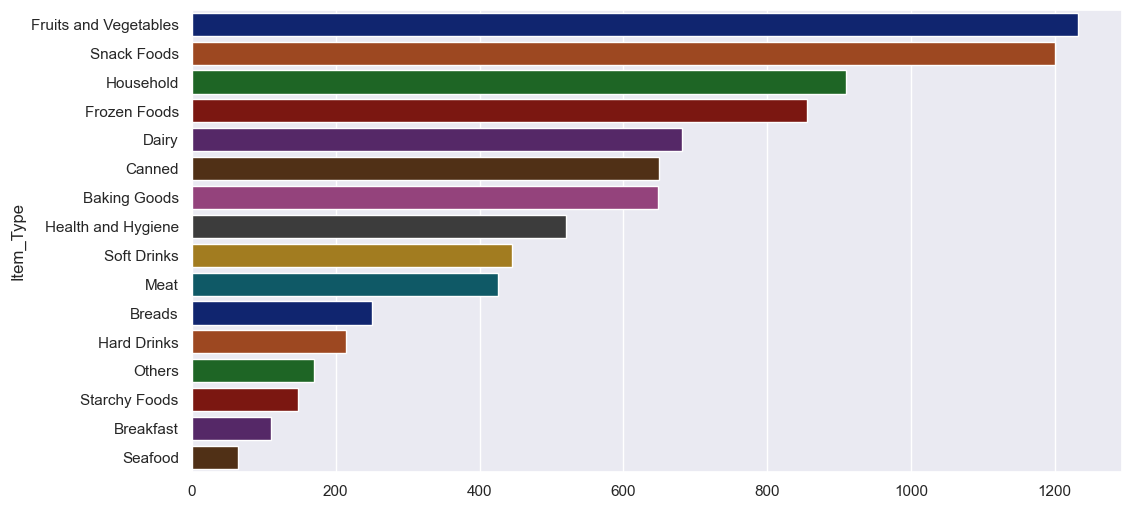

In [131]:
plt.figure(figsize=(12,6))
sns.barplot(x = df1.values, y = df1.index, palette = 'dark')
plt.show()

### Observations : 
As we can observe from the visualization the 'Fruits and vegetables' type has most no of items and 'Seafood' has least no of items

### 11.What is the year wise outlet establishment (Outlet_Establishment_Year)? [Hint: use group by here]

In [87]:
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

### 12.Visualize Outlet_Location_Type using pie charts. What observations are made from pie chart?

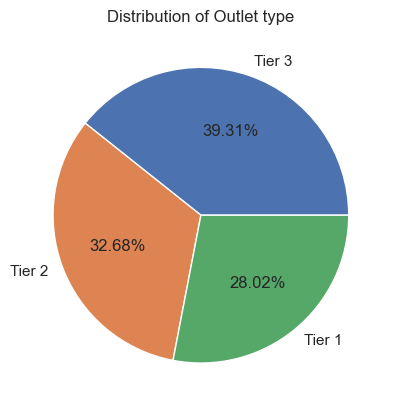

In [132]:
df['Outlet_Location_Type'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.title('Distribution of Outlet type')
plt.show()

### Observation :
As we can see the Items are somewhat evenly distributed among all the tier 1 , tier 2 and tier 3 cities, but specifically tier 3 location is topping the chart with 39.31% share 


### 13.Visualize item MRP price (Item_MRP) with histogram. What observations are made from histogram?

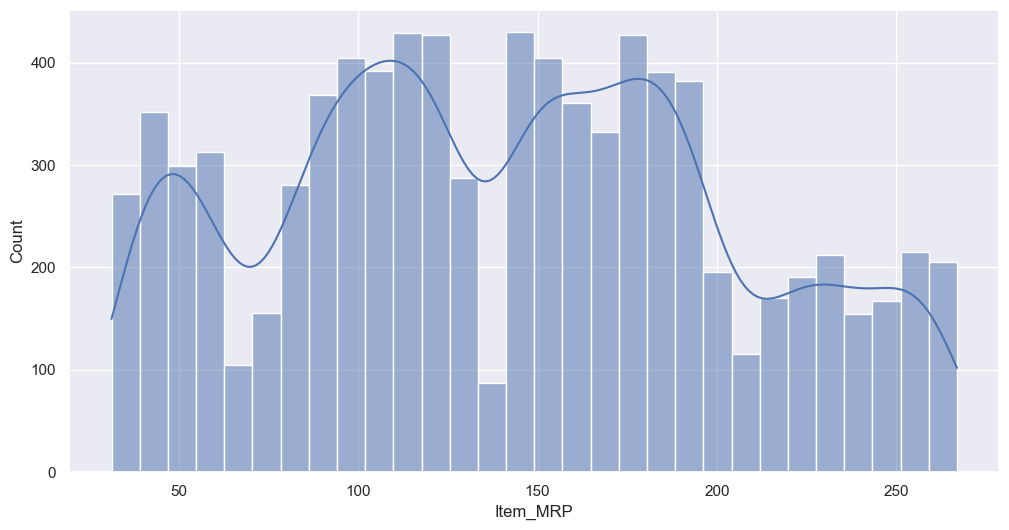

In [133]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'Item_MRP' , data =df, bins = 30, kde = True)
plt.show()

From the histogram we observe majority items MRP are in 90 - 130 range, the overall items MRP is spread across approximately 30 to 270 range

### 14.Visualize sum of each item type (Item_Type) with MRP price (Item_MRP). [Hint: use groupby here]

In [155]:
df2 = df.groupby('Item_Type')['Item_MRP'].sum().sort_values(ascending = False).round(2)
df2

Item_Type
Fruits and Vegetables    178124.08
Snack Foods              175433.92
Household                135976.53
Frozen Foods             118558.88
Dairy                    101276.46
Canned                    90706.73
Baking Goods              81894.74
Health and Hygiene        68025.84
Meat                      59449.86
Soft Drinks               58514.16
Breads                    35379.12
Hard Drinks               29334.68
Others                    22451.89
Starchy Foods             21880.03
Breakfast                 15596.70
Seafood                    9077.87
Name: Item_MRP, dtype: float64

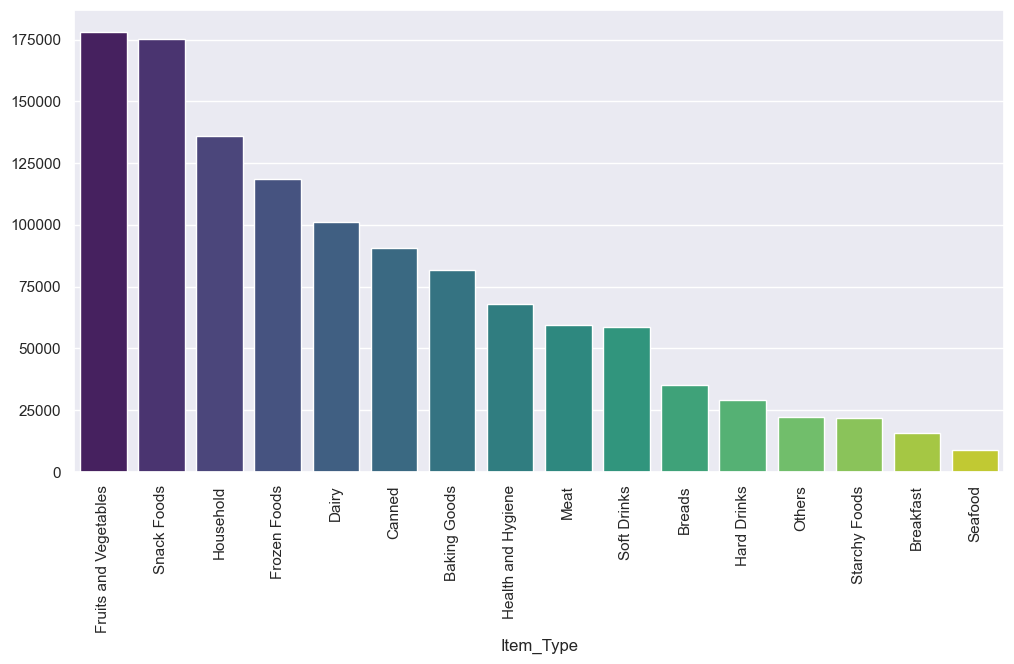

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(x = df2.index, y = df2.values, palette = 'viridis')
plt.xticks(rotation = 90)
plt.show()

### 15.How will you visualize Outlet_Identifier OUT049 with respect to Item_Type?

In [137]:
out049_data = df[df['Outlet_Identifier']=='OUT049']

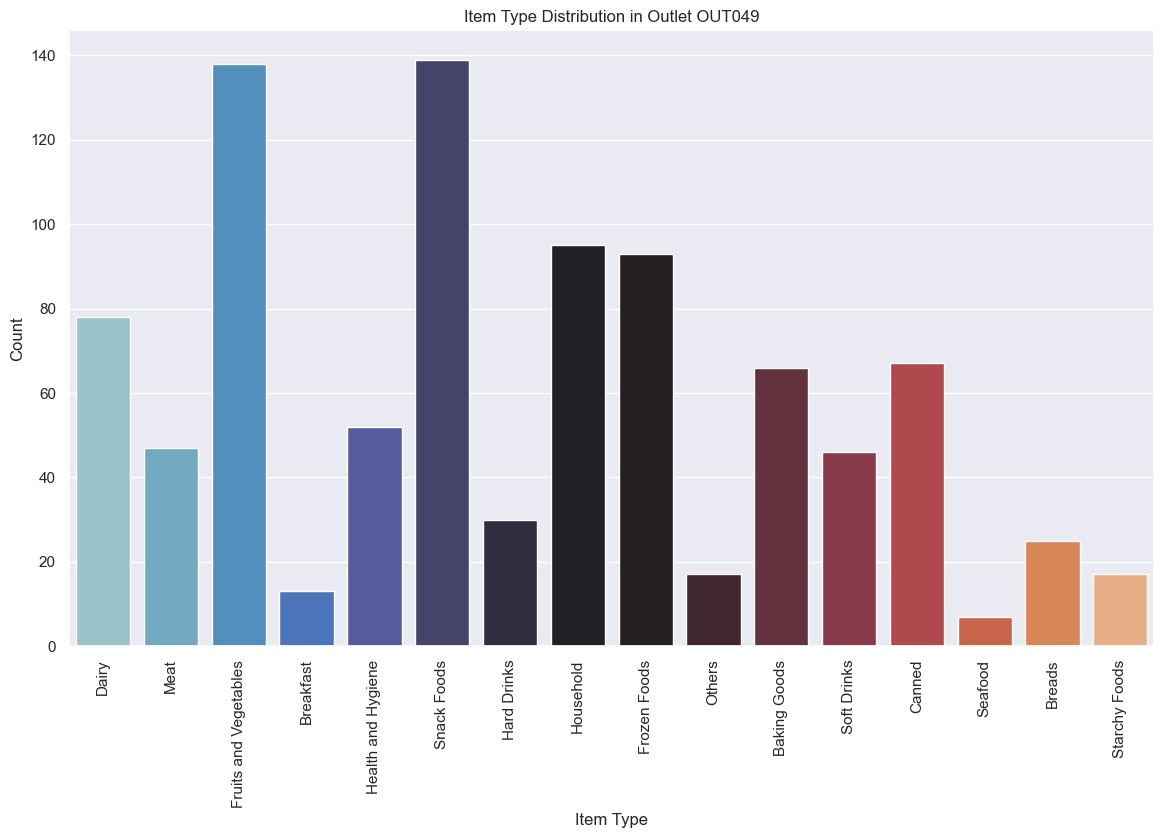

In [135]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Item_Type', data=out049_data, palette='icefire')
plt.xticks(rotation=90)
plt.title('Item Type Distribution in Outlet OUT049')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.show()

### 16.Visualize total amount of each outlet location (Outlet_Location_Type) with MRP price (Item_MRP). [Hint: use groupby here

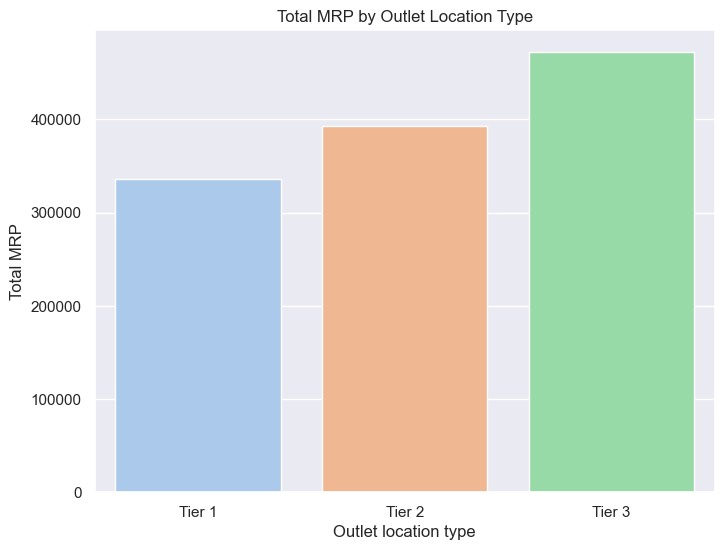

In [138]:
df3 = df_cleaned.groupby('Outlet_Location_Type')['Item_MRP'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x = df3.index, y  = df3.values, palette = 'pastel')
plt.title('Total MRP by Outlet Location Type')
plt.xlabel('Outlet location type')
plt.ylabel('Total MRP')
plt.show()

### 17.Plot histogram of item weights (Item_Weight).

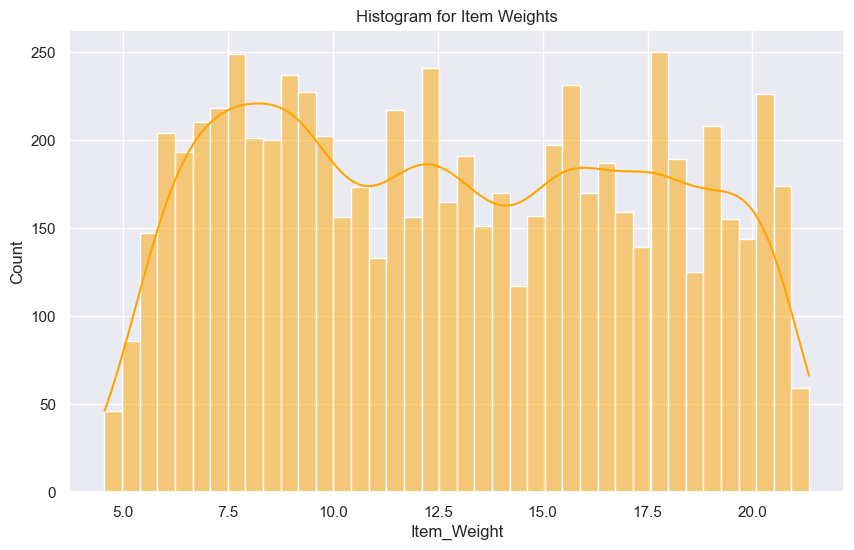

In [140]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Item_Weight', data =df, bins = 40, color = 'orange', kde = True)
plt.title('Histogram for Item Weights')
plt.show()

### 18.Plot a scatter plot of item visibility (Item_Visibility) with respect to item MRP (Item_MRP).

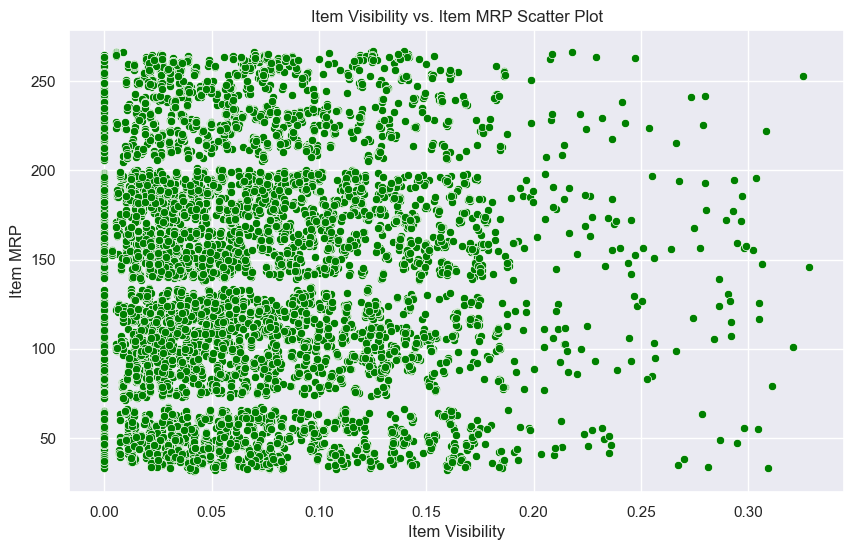

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_MRP', data=df, color = 'green')
plt.title('Item Visibility vs. Item MRP Scatter Plot')
plt.xlabel('Item Visibility')
plt.ylabel('Item MRP')
plt.show()

### 19.What is the total sum of item outlet sales (Item_Outlet_Sales)?

In [148]:
print("Total sum of item outlet sales:", df['Item_Outlet_Sales'].sum().round(2))


Total sum of item outlet sales: 18591125.41


### 20.Assuming current year as 2024 for each outlet (Outlet_Identifier) develop a column Years_Since_Established by subtracting Outlet_Establishment_Year from current year 

In [150]:
df['Years_Since_Established'] = 2024 - df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Since_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37
